In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
import preprocessing 

# FOR REPRODUCIBILITY
np.random.seed(7)

Using TensorFlow backend.


In [2]:
df=pd.read_csv('ABBV Historical Data.csv')
df=df[::-1]
df = df.reset_index()

In [3]:
df.head()

,index,Date,Price,Open,High,Low,Vol.,Change %
0,774,"Sep 13, 2018",96.33,93.42,96.37,93.41,4.85M,3.31%
1,773,"Sep 14, 2018",95.68,96.29,96.40,94.92,3.45M,-0.67%
2,772,"Sep 17, 2018",95.37,95.40,96.16,94.80,3.99M,-0.32%
3,771,"Sep 18, 2018",92.61,95.35,96.06,92.41,10.24M,-2.89%
4,770,"Sep 19, 2018",91.02,91.71,92.24,90.40,8.45M,-1.72%


In [4]:
obs = np.arange(1, len(df) + 1, 1)

In [5]:
OHLC_avg = df[['Price', 'Open', 'High', 'Low']].mean(axis = 1)

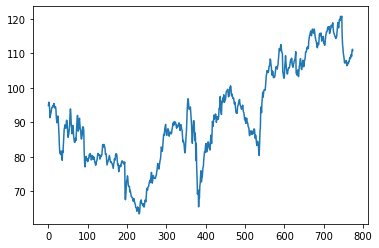

In [6]:
OHLC_avg.plot()

In [7]:
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)

In [8]:
def new_dataset(dataset, step_size):
    data_X, data_Y = [], []
    for i in range(len(dataset)-step_size-1):
        a = dataset[i:(i+step_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + step_size, 0])
    return np.array(data_X), np.array(data_Y)


In [9]:
step_size = 1

In [10]:
model3=Sequential()
model3.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model3.add(LSTM(16))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam') # Try SGD, adam, adagrad and compare!!!

new_OHLC_avg=OHLC_avg.copy()
# print(new_OHLC_avg.shape)

for i in range(90):
    print(i)
    trainX3, trainY3=new_dataset(new_OHLC_avg, 1)
    trainX3 = np.reshape(trainX3, (trainX3.shape[0], 1, trainX3.shape[1]))
    model3.fit(trainX3, trainY3, epochs=5, batch_size=1, verbose=2)
    
    last_val = new_OHLC_avg[-1]
    next_val = model3.predict(np.reshape(last_val, (1,1,1)))
    new_OHLC_avg = np.append(new_OHLC_avg, next_val[0])
    new_OHLC_avg=new_OHLC_avg.reshape(-1,1)
#     print(new_OHLC_avg.shape)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
0

Epoch 1/5
 - 2s - loss: 0.0253
Epoch 2/5
 - 2s - loss: 0.0011
Epoch 3/5
 - 2s - loss: 9.1321e-04
Epoch 4/5
 - 2s - loss: 7.2589e-04
Epoch 5/5
 - 2s - loss: 6.9242e-04
1
Epoch 1/5
 - 2s - loss: 6.9554e-04
Epoch 2/5
 - 2s - loss: 6.8475e-04
Epoch 3/5
 - 2s - loss: 6.5251e-04
Epoch 4/5
 - 2s - loss: 6.6639e-04
Epoch 5/5
 - 2s - loss: 7.1900e-04
2
Epoch 1/5
 - 2s - loss: 6.8220e-04
Epoch 2/5
 - 2s - loss: 7.0007e-04
Epoch 3/5
 - 2s - loss: 6.7765e-04
Epoch 4/5
 - 2s - loss: 6.9127e-04
Epoch 5/5
 - 2s - loss: 6.7120e-04
3
Epoch 1/5
 - 2s - loss: 6.7165e-04
Epoch 2/5
 - 2s - loss: 6.6142e-04
Epoch 3/5
 - 2s - loss: 7.0326e-04
Epoch 4/5
 - 2s - loss: 6.5878e-04
Epoch 5/5
 - 2s - loss: 6.7193e-04
4
Epoch 1/5
 - 2s - loss: 6.6592e-04
Epoch 2/5
 - 2s - loss: 6.7141e-04
Epoch 3/5
 - 2s - loss: 6.8077e-04
Epoch 4/5
 - 2s - loss: 6.9022e-04
Epoch 5/5
 - 2s - loss: 6.5521e-04
5
Epoch 1/5
 - 2s - loss: 6.6717e-04
Epoc

Epoch 3/5
 - 3s - loss: 5.6889e-04
Epoch 4/5
 - 2s - loss: 5.8501e-04
Epoch 5/5
 - 2s - loss: 5.9014e-04
43
Epoch 1/5
 - 3s - loss: 5.8286e-04
Epoch 2/5
 - 3s - loss: 5.8442e-04
Epoch 3/5
 - 2s - loss: 5.7588e-04
Epoch 4/5
 - 2s - loss: 6.0873e-04
Epoch 5/5
 - 3s - loss: 5.9166e-04
44
Epoch 1/5
 - 2s - loss: 5.9899e-04
Epoch 2/5
 - 2s - loss: 5.7933e-04
Epoch 3/5
 - 2s - loss: 5.8179e-04
Epoch 4/5
 - 2s - loss: 6.0519e-04
Epoch 5/5
 - 2s - loss: 6.0241e-04
45
Epoch 1/5
 - 2s - loss: 5.8037e-04
Epoch 2/5
 - 2s - loss: 5.8973e-04
Epoch 3/5
 - 2s - loss: 5.6563e-04
Epoch 4/5
 - 2s - loss: 5.8201e-04
Epoch 5/5
 - 2s - loss: 5.8806e-04
46
Epoch 1/5
 - 2s - loss: 5.7893e-04
Epoch 2/5
 - 2s - loss: 5.7267e-04
Epoch 3/5
 - 2s - loss: 5.8052e-04
Epoch 4/5
 - 2s - loss: 5.9790e-04
Epoch 5/5
 - 2s - loss: 5.9587e-04
47
Epoch 1/5
 - 2s - loss: 5.8429e-04
Epoch 2/5
 - 2s - loss: 5.9260e-04
Epoch 3/5
 - 2s - loss: 5.8642e-04
Epoch 4/5
 - 2s - loss: 6.0453e-04
Epoch 5/5
 - 2s - loss: 5.6980e-04
48
Ep

 - 2s - loss: 5.3416e-04
Epoch 4/5
 - 2s - loss: 5.4514e-04
Epoch 5/5
 - 2s - loss: 5.4060e-04
89
Epoch 1/5
 - 2s - loss: 5.5229e-04
Epoch 2/5
 - 2s - loss: 5.3904e-04
Epoch 3/5
 - 2s - loss: 5.4641e-04
Epoch 4/5
 - 2s - loss: 5.4622e-04
Epoch 5/5
 - 2s - loss: 5.4733e-04


In [11]:
next_val = scaler.inverse_transform(new_OHLC_avg[-90:])
# print ("Next Day Value:", next_val)
OHLC_avg=scaler.inverse_transform(OHLC_avg)

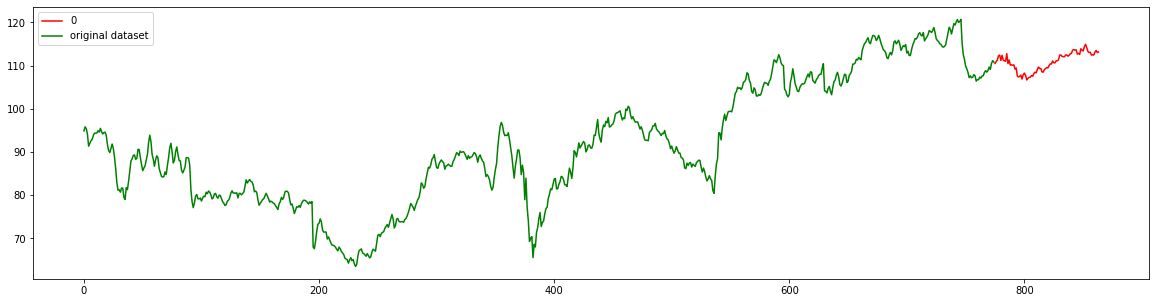

In [18]:
s = range(775,775+90)
next_val = pd.DataFrame(next_val, index=list(s))
next_val.plot(figsize=(20,5), color='red', label='forecast')
plt.plot(OHLC_avg, 'g', label = 'original dataset')
plt.legend()